# Zero2Basic - Hash Functions
I as recently working on a data mining task at work where I had a list of 


This post is intended to provide a quick introduction to hash functions and to discuss some of the practical use cases of hashes in data mining and machine learning. As with my other Zero2Basic posts, my aim is to provide a basic introduction to the concept and to demonstrate practical use cases.

### So what is a hash function?
*"A hash function is a deterministic function that maps inputs of arbitrary sizes to outputs of a fixed size." [Wiki](https://en.wikipedia.org/wiki/Hash_function)*


In [5]:
names = ['bog iger','bob seager','bob dole','{','123']

# Method 1
- Internal python **hash()**
- Doesnt work. Python 3 seeds randomly on each instance

In [6]:
[hash(name) for name in names]

[-8683157934459847274,
 -6525526042096646315,
 1347967004138474686,
 -7898148401109211603,
 5195192002307663527]

In [7]:
# post restart kernel
[hash(name) for name in names]

[-8683157934459847274,
 -6525526042096646315,
 1347967004138474686,
 -7898148401109211603,
 5195192002307663527]

# [Method 2](https://stackoverflow.com/questions/31701991/string-of-text-to-unique-integer-method)

 - two-way hash
 - not secure

In [9]:
import math
def convertToNumber (s):
    return int.from_bytes(s.encode(), byteorder='little')

def convertFromNumber (n):
    return n.to_bytes(math.ceil(n.bit_length() / 8), byteorder='little').decode()

In [10]:
names_bytes = [convertToNumber(name) for name in names]
names_bytes

[8243108394184437602,
 540220349545388005551970,
 7308338771146207074,
 123,
 3355185]

In [11]:
# test single
(123).to_bytes(math.ceil((123).bit_length() / 8), byteorder='little').decode()

'{'

In [12]:
[convertFromNumber(name) for name in names_bytes]

['bog iger', 'bob seager', 'bob dole', '{', '123']

# [Method 3](https://stackoverflow.com/questions/14023350/cheap-mapping-of-string-to-small-fixed-length-string)

- unlikley to collide. [Birthday Problem](https://stackoverflow.com/questions/30561096/chance-of-a-duplicate-hash-when-using-first-8-characters-of-sha1)
- secure. cannot be reversed!

In [20]:
import hashlib

def compute_cheap_hash(txt, length=6):
    # This is just a hash for debugging purposes.
    #    It does not need to be unique, just fast and short.
    hash = hashlib.sha1()
    hash.update(txt)
    return hash.hexdigest()[:length]

In [25]:
[compute_cheap_hash(name.encode(),9) for name in names]

['138a914dd', '137b17bdf', '92fbeb339', '60ba4b2da', '40bd00156']

In [24]:
[compute_cheap_hash(name.encode(),9) for name in names]

['138a914dd', '137b17bdf', '92fbeb339', '60ba4b2da', '40bd00156']

4294.967296


### [Birthday Problem](https://stackoverflow.com/questions/30561096/chance-of-a-duplicate-hash-when-using-first-8-characters-of-sha1)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
p=0.9
i = 8.0
d = 16**i
collision = np.sqrt(2*d*np.log(1/(1-p)))
print(f'For {int(collision)} items expect {p*100} % chance of collision using an {int(i)} length SHA1 hash')

For 140638 items expect 90.0 % chance of collision using an 8 length SHA1 hash


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


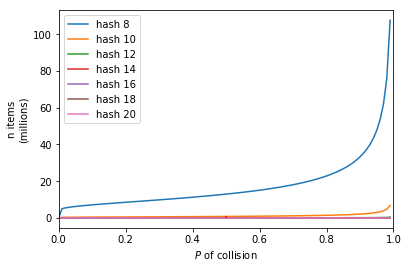

In [118]:
p = np.arange(0.01,1.01,0.01)

for k in np.arange(8,22,2):
    de = 16**float(k)
    plt.plot(1-p,[1000000/np.sqrt(2*de*np.log(1/(1-i))) for i in p], label='hash {}'.format(k))

plt.plot([0.5,0.5],[0,1],'r--')
plt.xlabel('$P$ of collision')
plt.ylabel('n items\n(millions)')
plt.xlim(0,1)
#plt.ylim(0,.5)
plt.legend();